In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('student_information.csv')

In [8]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [9]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [10]:
df.shape

(200, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [12]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


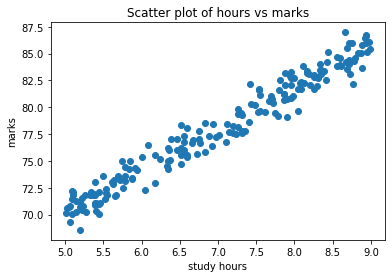

In [14]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel('study hours')
plt.ylabel('marks')
plt.title('Scatter plot of hours vs marks')
plt.show()

In [17]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [18]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [19]:
df2=df.fillna(df.mean())

In [20]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    200 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [22]:
X=df2.drop('student_marks',axis='columns')
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [23]:
y=df2.drop('study_hours',axis='columns')
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [24]:
print(X.shape,y.shape)

(200, 1) (200, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [26]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160, 1) (40, 1) (160, 1) (40, 1)


In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
model.score(X_test,y_test)

0.948241670182336

In [31]:
model.coef_

array([[3.91952524]])

In [32]:
model.intercept_

array([50.58222739])

In [33]:
model.predict([[5]])

array([[70.17985359]])

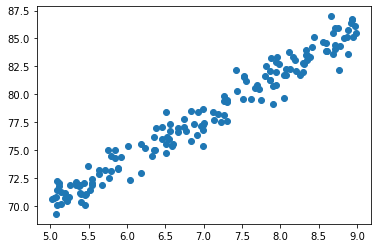

In [34]:
plt.scatter(X_train,y_train)

In [36]:
import joblib

In [37]:
joblib.dump(model,"predictor.pkl")

['predictor.pkl']

In [40]:
model1=joblib.load('predictor.pkl')

In [41]:
model1.predict([[6]])

array([[74.09937883]])